# ROC-curve

$$ FPR = \frac{FP}{FP+TN} $$

## Imp's

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np

## Data

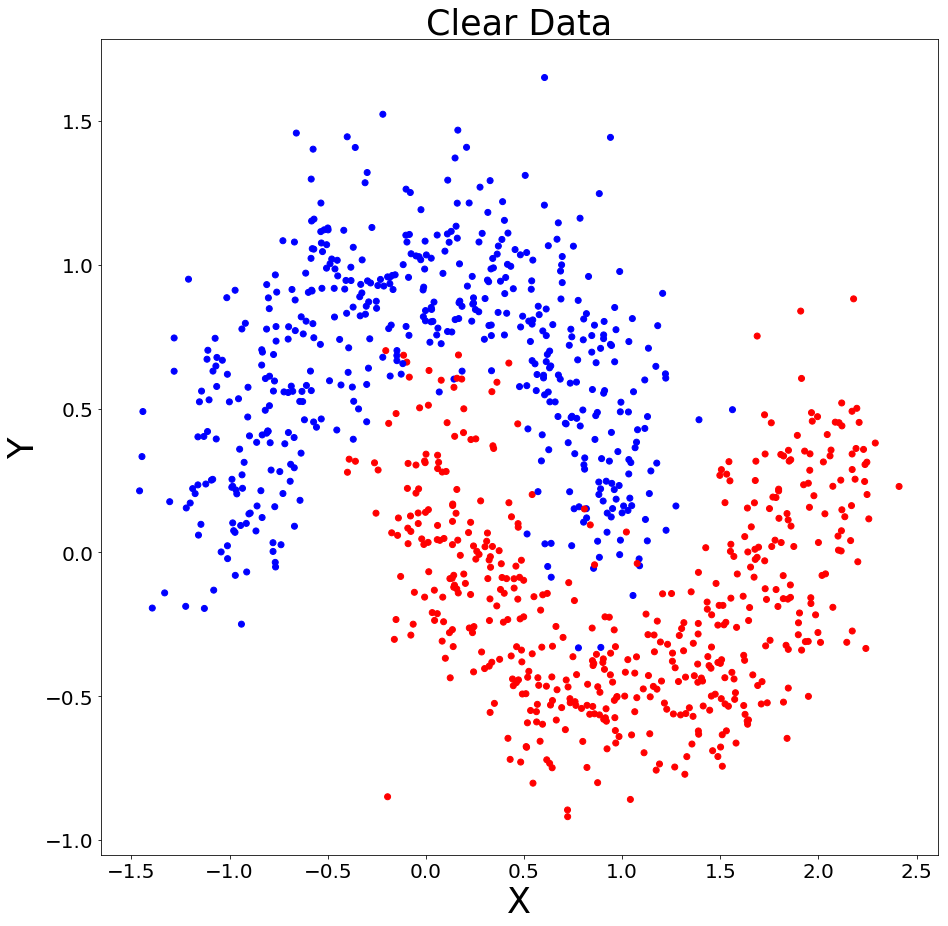

In [3]:
X, Y = make_moons(n_samples=1000, shuffle=True, noise=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cm.bwr)
plt.title('Clear Data', fontsize=35)
plt.xlabel('X', fontsize=35)
plt.ylabel('Y', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## ROC-curves: SVC & LogReg

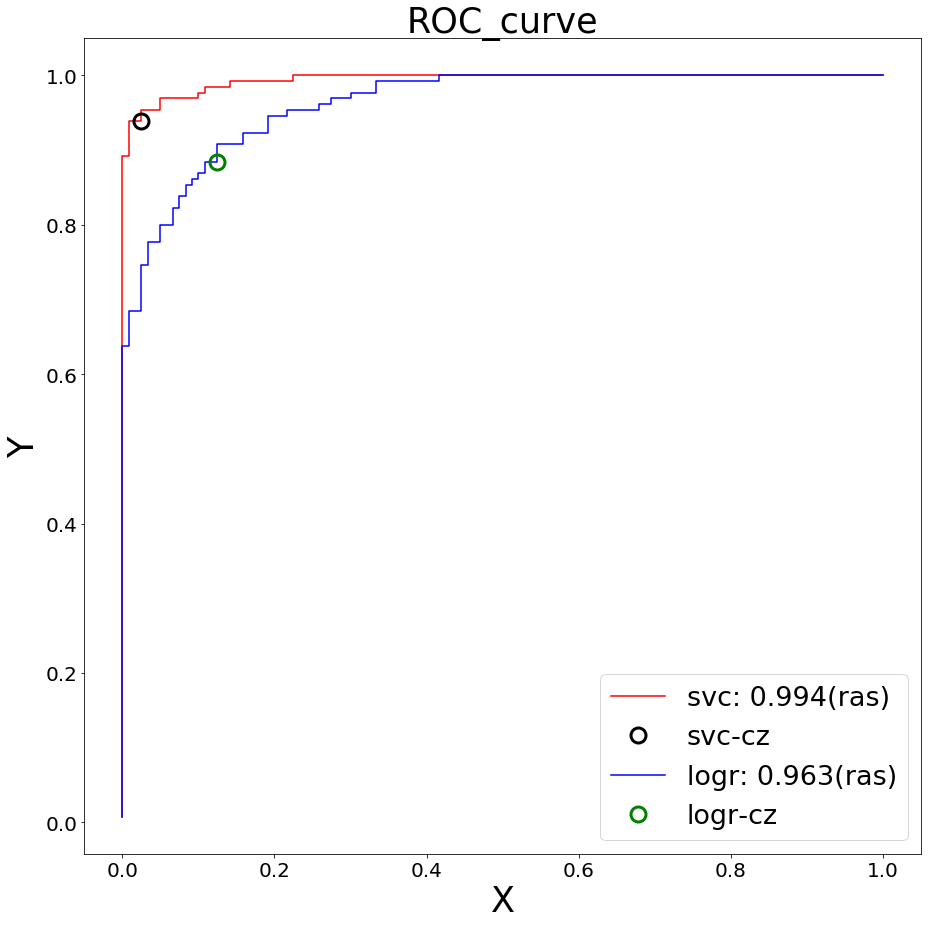

In [28]:
# SVC model
svc = SVC()
svc.fit(X_train, y_train)
svc_defu = svc.decision_function(X_test)
fpr_svc, tpr_svc, thr_svc = roc_curve(y_test, svc_defu)
close_zero_svc = np.argmin(np.abs(thr_svc))
svc_RAS = roc_auc_score(y_test, svc_defu)

# LogReg model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_defu = logreg.decision_function(X_test)
fpr_logreg, tpr_logreg, thr_logreg = roc_curve(y_test, logreg_defu)
close_zero_logreg = np.argmin(np.abs(thr_logreg))
logreg_RAS = roc_auc_score(y_test, logreg_defu)

# PLOTS
plt.figure(figsize=(15,15))

# SVC plot
plt.plot(fpr_svc, tpr_svc, 'r-', label='svc: {:.3f}(ras)'.format(svc_RAS))
plt.plot(fpr_svc[close_zero_svc], tpr_svc[close_zero_svc], 'o', color='k', markersize=15, fillstyle='none', mew=3, label='svc-cz')

# LogReg plot
plt.plot(fpr_logreg, tpr_logreg, 'b-', label='logr: {:.3f}(ras)'.format(logreg_RAS))
plt.plot(fpr_logreg[close_zero_logreg], tpr_logreg[close_zero_logreg], 'o', color='g', markersize=15, fillstyle='none', mew=3, label='logr-cz')

# Other plot settings
plt.legend(loc=4, prop={'size': 27})
plt.title('ROC_curve', fontsize=35)
plt.xlabel('X', fontsize=35)
plt.ylabel('Y', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Show
plt.show()

![gif](tenor.gif)